In [1]:
import utils.load_data as load_data
from collections import Counter
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [31]:
sentence_audio = load_data.load_sentences()

Finished data session Session1
Finished data session Session2
Finished data session Session3
Finished data session Session4
Finished data session Session5


In [32]:
durations = [item.duration for item in sentence_audio if item.emo_label != 'xxx']
print('Min', min(durations), 'Max', max(durations) , 'Mean', np.mean(durations))

Min 0.5849999999999973 Max 34.1388 Mean 4.589430948509485


(array([1.634e+03, 2.402e+03, 1.317e+03, 8.600e+02, 4.720e+02, 2.950e+02,
        1.780e+02, 8.800e+01, 7.000e+01, 2.400e+01, 1.800e+01, 6.000e+00,
        4.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 116. ,  451.5,  787. , 1122.5, 1458. , 1793.5, 2129. , 2464.5,
        2800. , 3135.5, 3471. , 3806.5, 4142. , 4477.5, 4813. , 5148.5,
        5484. , 5819.5, 6155. , 6490.5, 6826. ]),
 <a list of 20 Patch objects>)

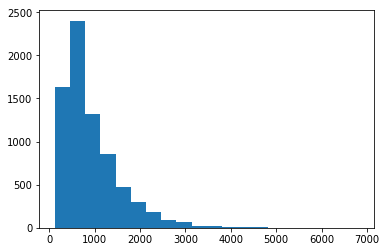

In [34]:
data = [item.audio_data for item in sentence_audio if item.emo_label != 'xxx']
lengths = [item.shape[0] for item in data] 
plt.hist(lengths, bins=20)

In [80]:
data_trimmed = [load_data.trim_and_pad_audio_data(item) for item in data]
data_trimmed = np.stack(data_trimmed)
data_trimmed.shape

(7380, 2000, 26)

In [59]:
emotion_labels = [item.emo_label for item in sentence_audio if item.emo_label != 'xxx']
emotions_count = Counter(emotion_labels)
emotions_count

Counter({'ang': 1103,
         'exc': 1041,
         'fru': 1849,
         'hap': 595,
         'neu': 1708,
         'sad': 1084})

In [76]:
emotions = list(set(emotion_labels))
emotions_to_int = dict((emotion, i) for i, emotion in enumerate(emotions))
emotions_int = np.array([emotions_to_int[emotion] for emotion in emotion_labels])
emotions_onehot = np.zeros((len(emotion_labels), len(emotions)))
emotions_onehot[np.arange(len(emotion_labels)), emotions_int] = 1 
emotions_onehot.shape

(7380, 6)

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(data_trimmed, emotions_onehot, test_size=0.2)

In [87]:
from models.ctc import LSTMctc

lstm = LSTMctc(num_classes=emotions, num_features=26) 
